In [1]:
# pip install wordcloud

In [1]:
# pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Analysis

In [6]:
# Load tha data

df=pd.read_csv(r"C:\Users\user\Downloads\amazon_alexa.tsv",delimiter = '\t',quoting = 3)


In [8]:
df[df['feedback']==0]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more ac...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [10]:
df.head(50)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1


In [15]:
df['verified_reviews'][46]

'"It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals."'

In [ ]:
df.predict('

In [21]:
# df.drop(["date"], axis= 1, inplace=True)

In [23]:
df.shape

(3150, 5)

In [25]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [27]:
# columns Names
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [29]:
# checking for features which have null values
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [31]:
# Getting the record where 'verified_reviews' is null

df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [33]:
# Dropping the null record
df.dropna(inplace=True)

In [35]:
df.shape

(3149, 5)

In [37]:
# Creating a new column 'length' which contain the length of the string in 'verified_reviews' columns
df['length'] = df['verified_reviews'].apply(len)

In [39]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [41]:
# Randomly checking for 10th record

print(df.iloc[10]['verified_reviews'])
print(len(df.iloc[10]['verified_reviews']))
print(df.iloc[10]['length'])

"I sent it to my 85 year old Dad, and he talks to it constantly."
65
65


In [43]:
# checking the datatypes of the features
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

# Alalyzing 'rating' columns

In [46]:
len(df)                                # 2286/3149*100 = 72 % reviews are 5* reviews

3149

In [48]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

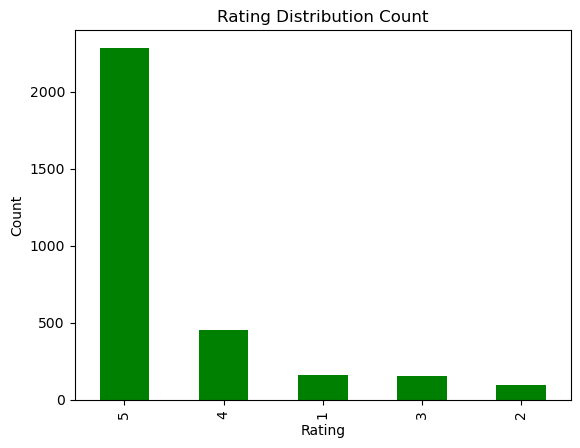

In [50]:
# Bar plot to visualize the total counts of each rating

df['rating'].value_counts().plot.bar(color = 'g')
plt.title('Rating Distribution Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [52]:
# Indicing the percentage distribution of each rating
round(df['rating'].value_counts()/df.shape[0]*100,2)

rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64

<Axes: ylabel='Percentage'>

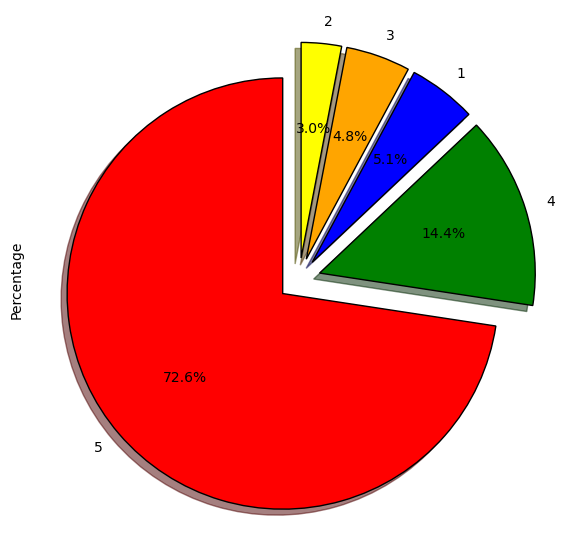

In [54]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth': 1, "edgecolor": 'black'}
tags = df['rating'].value_counts()/df.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage')

# Analyzing 'feedback' column

In [57]:
# Distinct values of 'feedback' and its count

df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

### There are 2 distinct values of 'feedback' present - 0,1

In [60]:
# Extracting the verifiedd_reviews value for one record with feedback = 0
review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [62]:
# Extracting the verifiedd_reviews value for one record with feedback = 1
review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


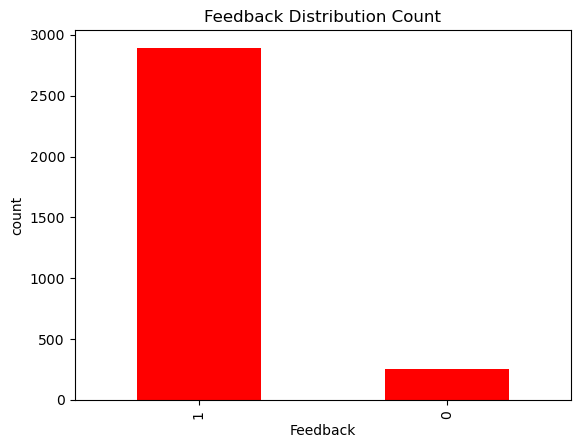

In [64]:
# Bar plot to visualize the feedback column
df['feedback'].value_counts().plot.bar(color = 'r')
plt.title('Feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('count')
plt.show()

In [66]:
# Indicing the percentage distribution of each feedback 
round(df['feedback'].value_counts()/df.shape[0]*100,2)

feedback
1    91.87
0     8.13
Name: count, dtype: float64

<Axes: ylabel='Percentage'>

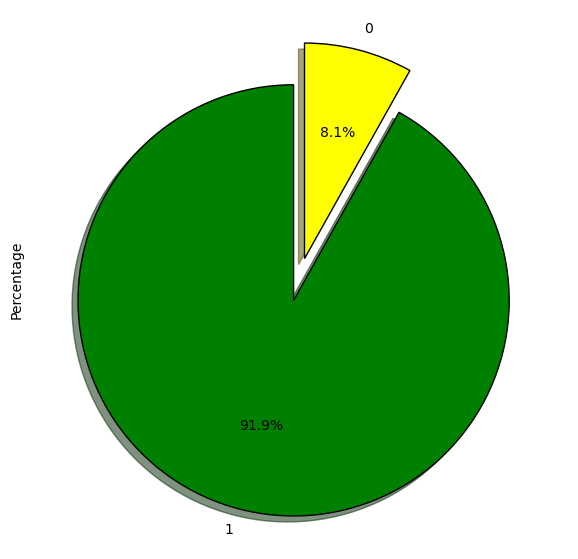

In [68]:
fig = plt.figure(figsize=(7,7))
colors = ('green','yellow')
wp = {'linewidth': 1, "edgecolor": 'black'}
tags = df['feedback'].value_counts()/df.shape[0]
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage')

In [70]:
# feedback  = 0
df[df['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [72]:
# feedback = 1
df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [74]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

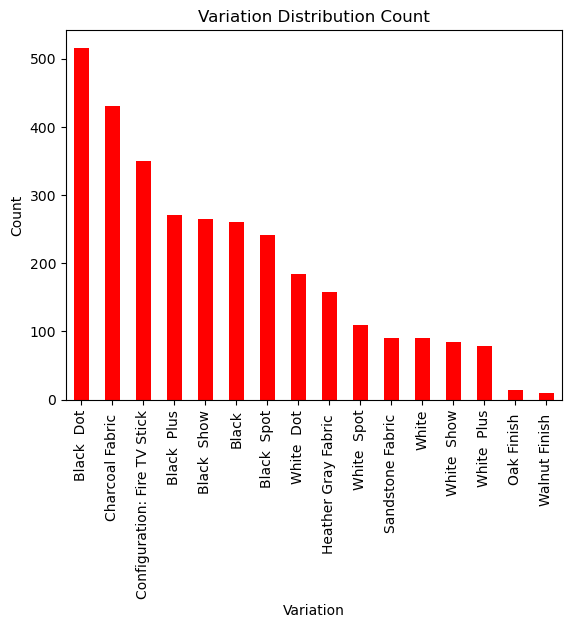

In [76]:
# Bar plot to visualize the feedback column
df['variation'].value_counts().plot.bar(color = 'r')
plt.title('Variation Distribution Count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [78]:
# Indicing the percentage distribution of each feedback 
round(df['variation'].value_counts()/df.shape[0]*100,2)

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64

In [80]:
round(df.groupby('variation')['rating'].mean(),3)

variation
Black                           4.234
Black  Dot                      4.453
Black  Plus                     4.370
Black  Show                     4.491
Black  Spot                     4.311
Charcoal Fabric                 4.730
Configuration: Fire TV Stick    4.591
Heather Gray Fabric             4.694
Oak Finish                      4.857
Sandstone Fabric                4.356
Walnut Finish                   4.889
White                           4.167
White  Dot                      4.424
White  Plus                     4.359
White  Show                     4.282
White  Spot                     4.312
Name: rating, dtype: float64

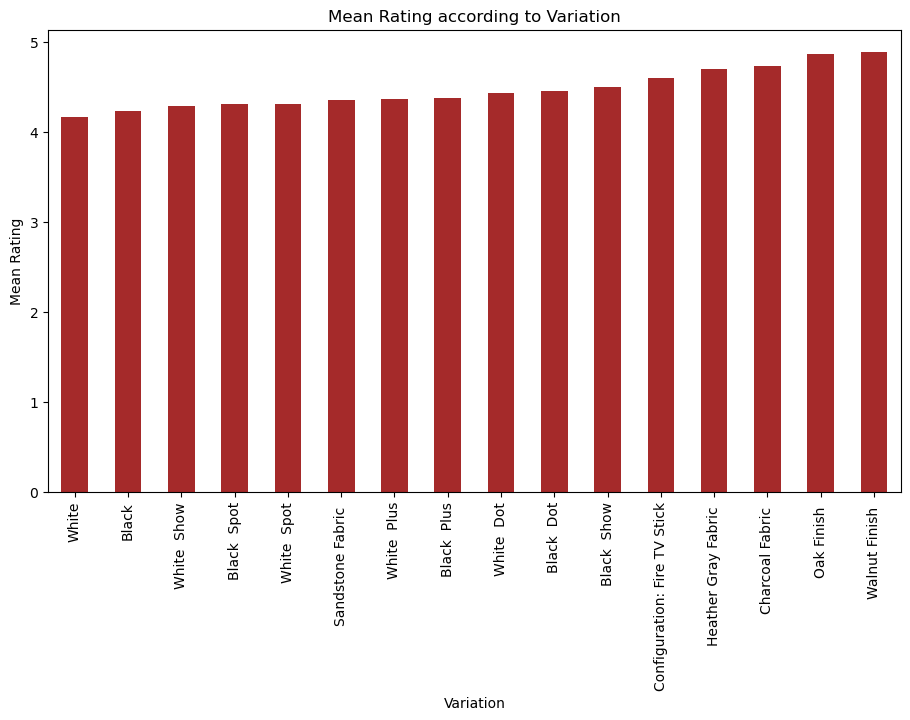

In [82]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize = (11,6))
plt.title('Mean Rating according to Variation')
plt.xlabel('Variation')
plt.ylabel('Mean Rating')
plt.show()

In [84]:
df['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

# Analyzing 'verified_reviews' column

[Text(0.5, 1.0, 'Distribution of length of review')]

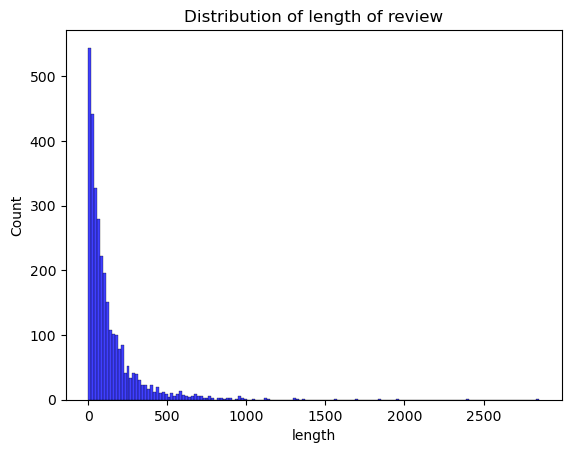

In [87]:
sns.histplot(df['length'],color = 'blue').set(title='Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

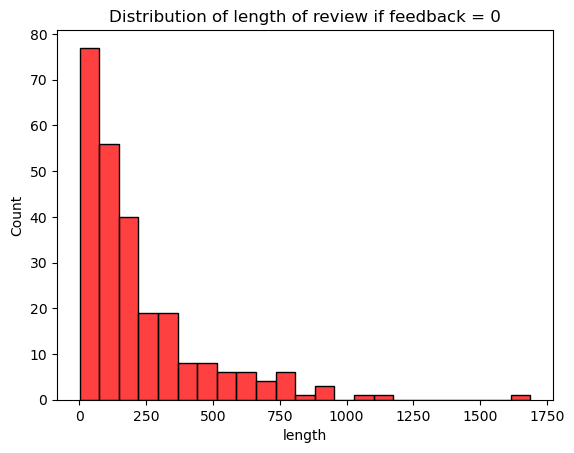

In [88]:
sns.histplot(df[df['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

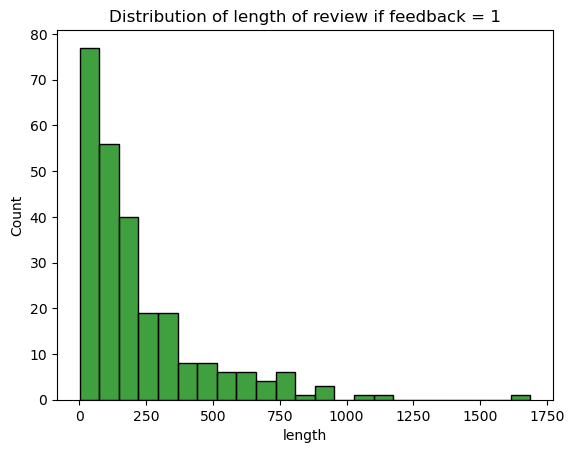

In [90]:
sns.histplot(df[df['feedback']==0]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

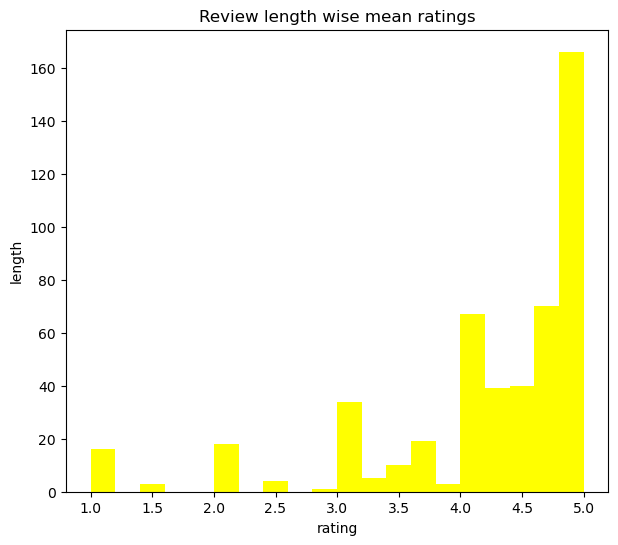

In [91]:
df.groupby('length')['rating'].mean().plot.hist(color = 'yellow', figsize = (7,6), bins=20)
plt.title('Review length wise mean ratings')
plt.xlabel('rating')
plt.ylabel('length')
plt.show()

In [93]:
cv=CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)

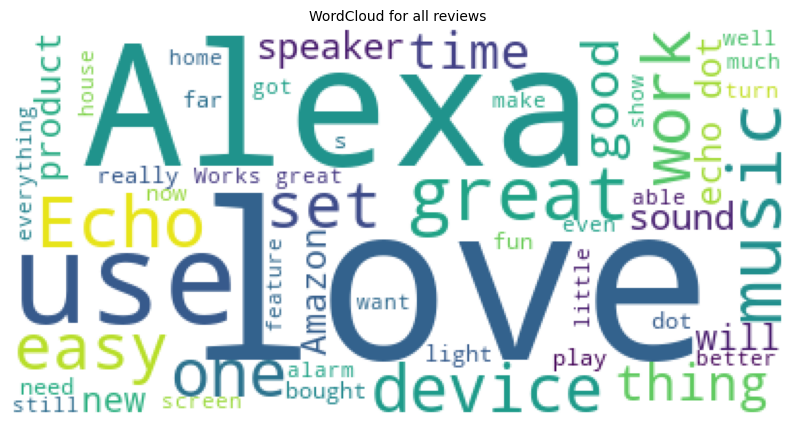

In [95]:
# Combine All Reviews
reviews = " ".join([review for review in df['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [97]:
# Combine all reviews for each feedback category and splitting them into individual words

neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

# Finding word for reviews which are present in the feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

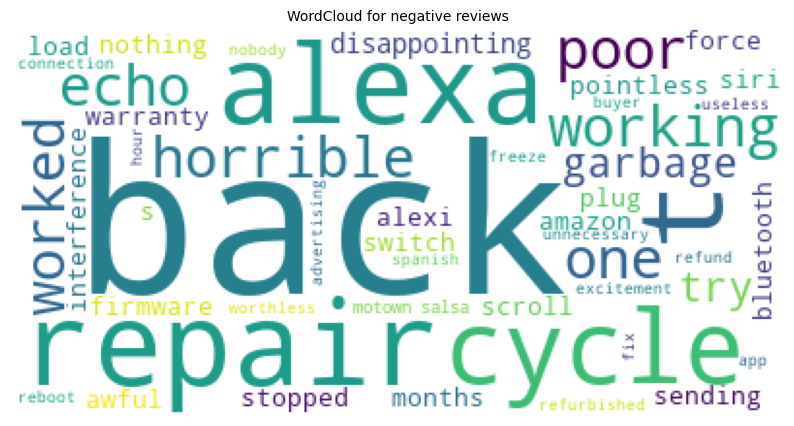

In [98]:
wc = WordCloud(background_color='white',max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordCloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

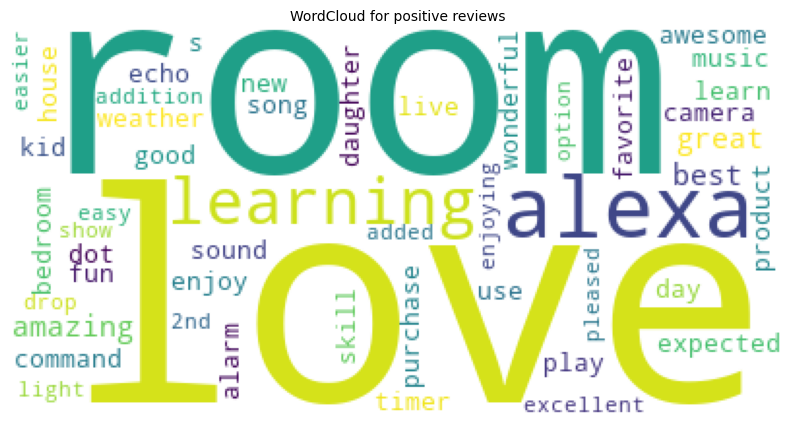

In [99]:
wc = WordCloud(background_color='white',max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordCloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

# Preprocessing and Modelling

In [102]:
corpus = []
stemmer = PorterStemmer()
for i in range(0,df.shape[0]):
    review = re.sub('^a-zA-Z]',' ',df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

### Using Count Vectorizer to create bag of words

In [109]:
# CountVectorizer is a technique used in nlp to convert txt data into numerical data because model understand only numeric data
cv = CountVectorizer(max_features = 2500)

# Storing independent and dependent variable in x and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [111]:
import os

# Check if 'Models' directory exists, if not, create it
if not os.path.exists('Models'):
    os.makedirs('Models')

In [113]:
# Saving the Count Vectorizer
pickle.dump(cv, open("Models/countVectorizer.pkl","wb"))

In [115]:
# Checking the shape of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [117]:
# Splitting data into train and test set with 30% data with testing

X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=15, test_size=0.3)


print(f"X train:{X_train.shape}")
print(f"y train:{y_train.shape}")
print(f"X test:{X_test.shape}")
print(f"y test:{y_test.shape}")

X train:(2204, 2500)
y train:(2204,)
X test:(945, 2500)
y test:(945,)


In [119]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 18
X test max value: 10


### Scaling the Data
#### we will scale X_train and X_test so that all values are between 0 and 1

In [122]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [124]:
import os
import pickle

# Check if 'Model' directory exists, if not, create it
if not os.path.exists('Model'):
    os.makedirs('Model')

# Save the scaler model
pickle.dump(scaler, open('Model/scaler.pkl', 'wb'))


# Random Forest

In [127]:
# Fitting the scaled model
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [132]:
# Accuracy of the model on training and testing

print(f"Training Accuracy:", model_rf.score(X_train_scl,y_train))
print(f"Testing Accuracy:", model_rf.score(X_test_scl,y_test))

Training Accuracy: 0.9945553539019963
Testing Accuracy: 0.9439153439153439


In [134]:
# Prediction on the test
y_pred = model_rf.predict(X_test_scl)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load your trained vectorizer and model
vectorizer = joblib.load('Models/countVectorizer.pkl')  # Assuming you saved the vectorizer during model training
model = joblib.load('model_rf.pkl')

# Input preprocessing
review = "It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals."  # Example review input
transformed_review = vectorizer.transform([review])  # Transform the review using the vectorizer

# Predict sentiment (only for the review in this example)
prediction = model.predict(transformed_review)
print(prediction)

[0]


In [140]:
pickle.dump(model_rf, open('model_rf.pkl', 'wb'))

In [142]:
from sklearn.metrics import confusion_matrix

In [144]:
# Confusion Martix
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 29  49]
 [  4 863]]


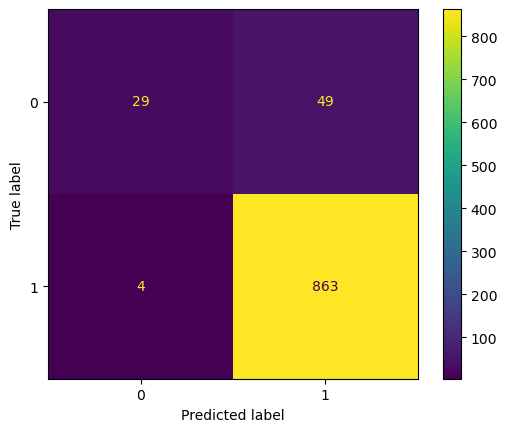

In [146]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

# K Fold Cross Validation

In [149]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy:", accuracies.mean())
print("Standard Variance:", accuracies.std())

Accuracy: 0.930129576306047
Standard Variance: 0.008882591790756914


### Applying GridSearchCV to get the optimal parameter on random forest

In [151]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [80, 100],
    'min_samples_split': [2, 5, 10],  # Corrected this line
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [152]:
cv_object = StratifiedKFold(n_splits = 2)      # this will take more time

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 100],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             return_train_score=True)

In [153]:
# Getting the best parameter from  the grid search
print("Best Parameter Combination : {}".format(grid_search, params))

Best Parameter Combination : GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 100],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             return_train_score=True)


In [154]:
print("cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for the test set : {}", accuracy_score(y_test,y_pred))

cross validation mean accuracy on train set : 94.93219399072395
cross validation mean accuracy on test set : 92.22877596289574
Accuracy score for the test set : {} 0.9439153439153439


# XgBoost

In [156]:
pip install xgboost

In [157]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [158]:
# Accuracy of the model on training and testing

print(f"Training Accuracy:", model_xgb.score(X_train_scl, y_train))
print(f"Testing Accuracy:", model_xgb.score(X_test_scl, y_test))

Training Accuracy: 0.9736842105263158
Testing Accuracy: 0.9333333333333333


In [159]:
y_pred = model_xgb.predict(X_test)

In [160]:
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 28  50]
 [ 14 853]]


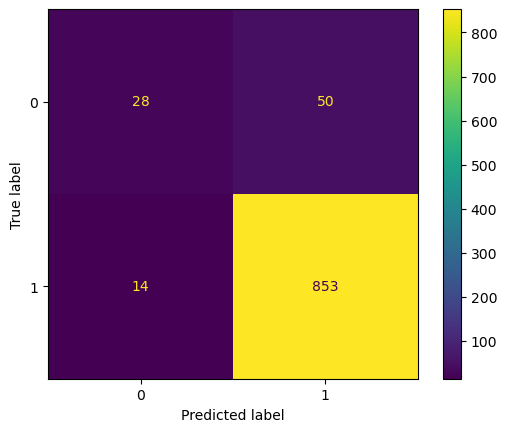

In [161]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [162]:
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

# Decision Tree Classifier

In [164]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [165]:
# Accuracy of the model on training and testing

print(f"Training Accuracy:", model_dt.score(X_train_scl, y_train))
print(f"Testing Accuracy:", model_dt.score(X_test_scl, y_test))

Training Accuracy: 0.9945553539019963
Testing Accuracy: 0.9195767195767196


In [166]:
y_pred = model_dt.predict(X_test)

In [167]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 48  30]
 [ 96 771]]


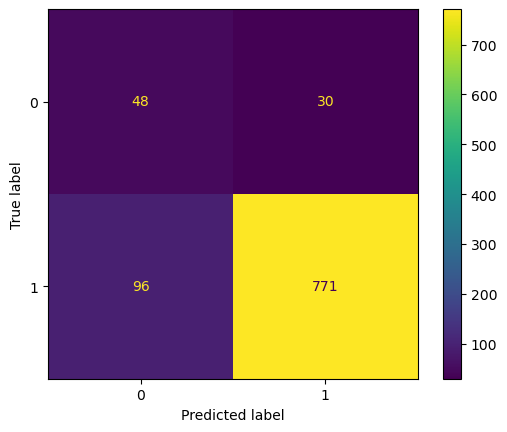

In [168]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
cm_display.plot()
plt.show()